In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

df = pd.read_csv('../airplane_df.csv')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/ws/w4d9z41n7vj1pg3kqv95frm80000gn/T/ipykernel_2974/1859478540.py:7: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../airplane_df.csv')


## Filter to only US accidents 

In [3]:
df = df.set_index('Event.Id')

us_accidents = df[df['Country'] == 'United States']

## Group injuries by state 

In [4]:
injuries_by_state = us_accidents.groupby('State').sum(numeric_only = True).loc[:, 'Total.Fatal.Injuries':]
injuries_by_state['Total.People'] = injuries_by_state.sum(axis=1)

In [5]:
injuries_by_state

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.People
State,,,,,
AK,309.0,437.0,255.0,3243.0,4244.0
AL,112.0,68.0,58.0,386.0,624.0
AR,96.0,79.0,64.0,352.0,591.0
ATL,15.0,0.0,2.0,274.0,291.0
AZ,251.0,128.0,125.0,1900.0,2404.0
...,...,...,...,...,...
WA,170.0,161.0,128.0,2223.0,2682.0
WI,135.0,118.0,92.0,764.0,1109.0
WN,2.0,0.0,0.0,1.0,3.0


## Quick visualization of injury distribution by state 
Here we can see how that in every state, most people were uninjured after an airplane incident.

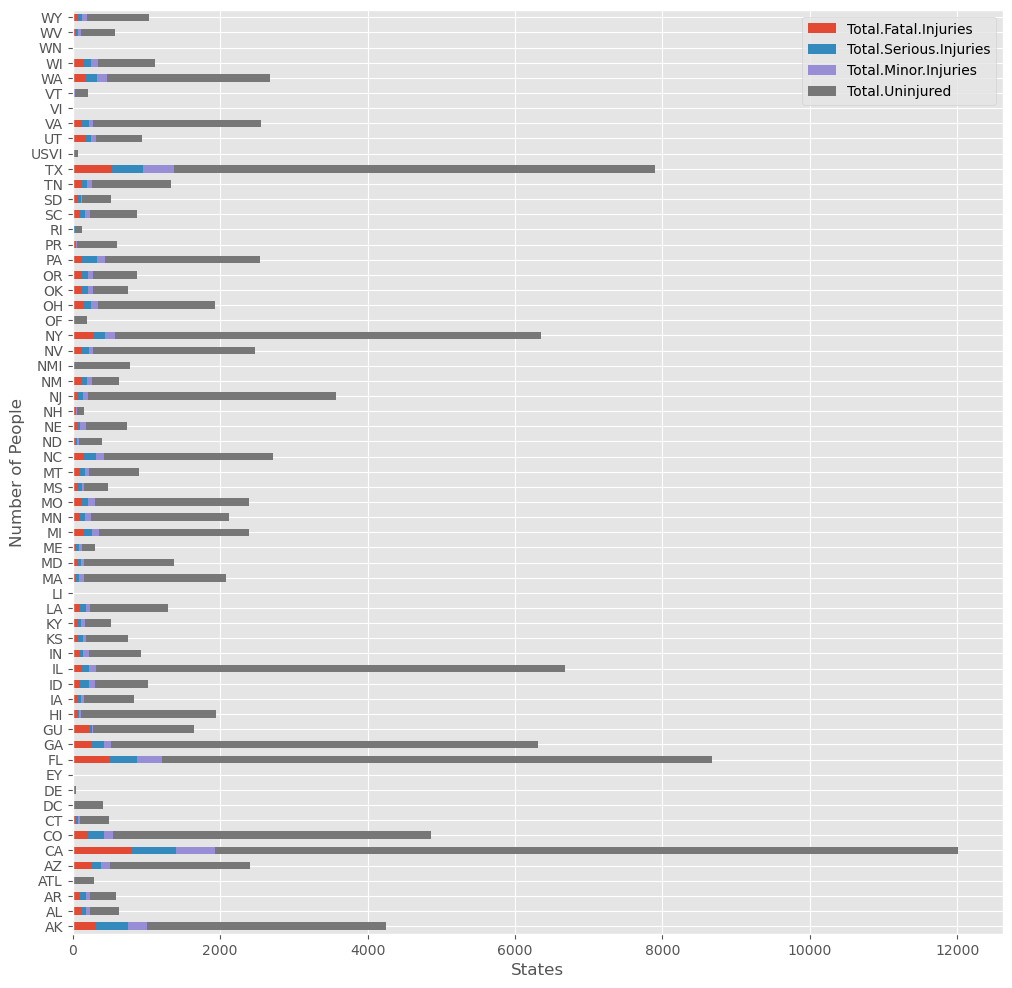

In [6]:
plt.style.use('ggplot')
injuries_by_state[injuries_by_state.columns[:4]].plot(kind='barh', stacked=True, figsize=(12, 12),
                                                     ylabel='Number of People', xlabel = 'States');

In [7]:
injuries_by_state['Fatality.Perc'] = (injuries_by_state['Total.Fatal.Injuries'] / injuries_by_state['Total.People']) * 100
injuries_by_state.sort_values(by='Fatality.Perc', ascending=False)

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.People,Fatality.Perc
State,,,,,,
VI,1.0,0.0,0.0,0.0,1.0,100.000000
EY,2.0,0.0,0.0,0.0,2.0,100.000000
WN,2.0,0.0,0.0,1.0,3.0,66.666667
NM,131.0,68.0,62.0,368.0,629.0,20.826709
DE,9.0,4.0,6.0,28.0,47.0,19.148936
...,...,...,...,...,...,...
IL,116.0,103.0,100.0,6366.0,6685.0,1.735228
OF,3.0,0.0,3.0,182.0,188.0,1.595745
NMI,1.0,7.0,9.0,762.0,779.0,0.128370


In [8]:
df.head()

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State
Event.Id,,,,,,,,,,,,,,,,,,,,,
20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,Non-Fatal,...,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,MA
20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,Non-Fatal,...,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,WA
20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,Non-Fatal,...,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,NJ
20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,Non-Fatal,...,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,LA
20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,Fatal(1),...,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,TX


In [9]:
accidents_per_state = us_accidents.groupby('State').count()['Accident.Number'].rename('Total.Accidents')
injuries_by_state = injuries_by_state.merge(accidents_per_state, on='State', how='left')
injuries_by_state

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.People,Fatality.Perc,Total.Accidents
State,,,,,,,
AK,309.0,437.0,255.0,3243.0,4244.0,7.280867,1554
AL,112.0,68.0,58.0,386.0,624.0,17.948718,334
AR,96.0,79.0,64.0,352.0,591.0,16.243655,376
ATL,15.0,0.0,2.0,274.0,291.0,5.154639,12
AZ,251.0,128.0,125.0,1900.0,2404.0,10.440932,853
...,...,...,...,...,...,...,...
WA,170.0,161.0,128.0,2223.0,2682.0,6.338553,693
WI,135.0,118.0,92.0,764.0,1109.0,12.173129,438
WN,2.0,0.0,0.0,1.0,3.0,66.666667,4


In [112]:
pd.set_option('display.max_rows', None)
injuries_by_state[['Total.People', 'Fatality.Perc', 'Total.Accidents', 'Avg.Plane.Capacity']].sort_values(by=['Total.Accidents'], ascending=False). \
loc[(injuries_by_state['Total.Accidents'] >= injuries_by_state['Total.Accidents'].quantile(0.25))]

,Total.People,Fatality.Perc,Total.Accidents,Avg.Plane.Capacity
State,,,,
CA,12018.0,6.56,2192,5.48
TX,7895.0,6.79,1807,4.37
FL,8668.0,5.72,1651,5.25
AK,4244.0,7.28,1554,2.73
AZ,2404.0,10.44,853,2.82
CO,4857.0,4.39,726,6.69
WA,2682.0,6.34,693,3.87
GA,6310.0,4.06,674,9.36
NC,2710.0,5.72,545,4.97


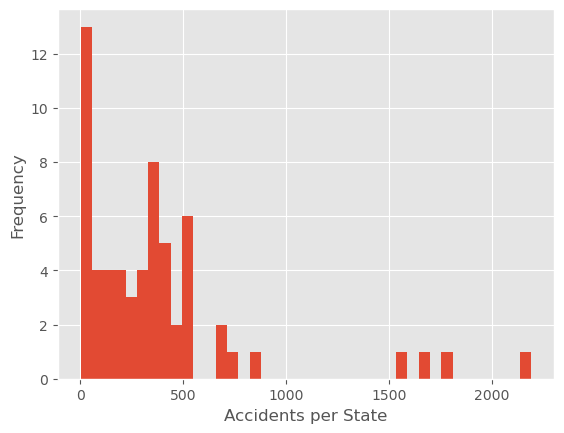

In [11]:
injuries_by_state['Total.Accidents'].plot(kind='hist', bins=40, xlabel='Accidents per State');

In [12]:
injuries_by_state[injuries_by_state['Total.Accidents'] > 1500]

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.People,Fatality.Perc,Total.Accidents
State,,,,,,,
AK,309.0,437.0,255.0,3243.0,4244.0,7.280867,1554
CA,788.0,609.0,533.0,10088.0,12018.0,6.556831,2192
FL,496.0,379.0,336.0,7457.0,8668.0,5.722197,1651
TX,536.0,415.0,420.0,6524.0,7895.0,6.789107,1807


In [13]:
injuries_by_state['Avg.Plane.Capacity'] = injuries_by_state['Total.People'] / injuries_by_state['Total.Accidents']

In [14]:
first_quartile = injuries_by_state['Total.Accidents'].quantile(.25)
injuries_by_state = injuries_by_state.loc[injuries_by_state['Total.Accidents'] >= first_quartile]. \
                    sort_values(by='Fatality.Perc', ascending=False)


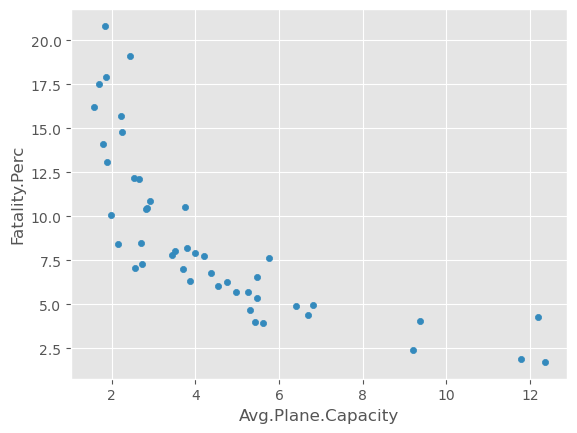

In [15]:
injuries_by_state.plot(kind='scatter', y='Fatality.Perc', x='Avg.Plane.Capacity');

In [110]:
injuries_by_state.head(20)

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.People,Fatality.Perc,Total.Accidents,Avg.Plane.Capacity
State,,,,,,,,
NM,131.0,68.0,62.0,368.0,629.0,20.83,342,1.84
UT,179.0,66.0,68.0,623.0,936.0,19.12,385,2.43
AL,112.0,68.0,58.0,386.0,624.0,17.95,334,1.87
NH,27.0,11.0,20.0,96.0,154.0,17.53,91,1.69
AR,96.0,79.0,64.0,352.0,591.0,16.24,376,1.57
MS,75.0,45.0,33.0,325.0,478.0,15.69,215,2.22
OK,111.0,95.0,68.0,475.0,749.0,14.82,335,2.24
OR,123.0,90.0,68.0,591.0,872.0,14.11,489,1.78
ME,40.0,51.0,28.0,186.0,305.0,13.11,161,1.89


In [17]:
injuries_by_state['Avg.Plane.Capacity'] = injuries_by_state['Avg.Plane.Capacity'].round(2)
injuries_by_state['Fatality.Perc'] = injuries_by_state['Fatality.Perc'].round(2)

In [18]:
injuries_by_state.to_csv('injuries_by_state.csv', encoding='UTF-8')

In [19]:
# to_export = injuries_by_state.reset_index()
# to_export

In [20]:
us_accidents.head(1)

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State
Event.Id,,,,,,,,,,,,,,,,,,,,,
20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,Non-Fatal,...,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,MA


In [ ]:
injuries_list = ['Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Total.Fatal.Injuries']
us_accidents = us_accidents.loc[:, injuries_list]
us_accidents = us_accidents.fillna(0)
us_accidents['Total.People'] = us_accidents['Total.Fatal.Injuries'] + us_accidents['Total.Serious.Injuries'] + us_accidents['Total.Minor.Injuries'] + us_accidents['Total.Uninjured']
us_accidents['Fatality.Perc'] = (us_accidents['Total.Fatal.Injuries'] / us_accidents['Total.People']) * 100
us_accidents['Non.Fatal.Injuries'] = us_accidents['Total.Serious.Injuries'] + us_accidents['Total.Minor.Injuries'] + us_accidents['Total.Uninjured']
us_accidents.sort_values(by='Fatality.Perc', ascending=False)

<Axes: xlabel='Total.Fatal.Injuries', ylabel='Non.Fatal.Injuries'>

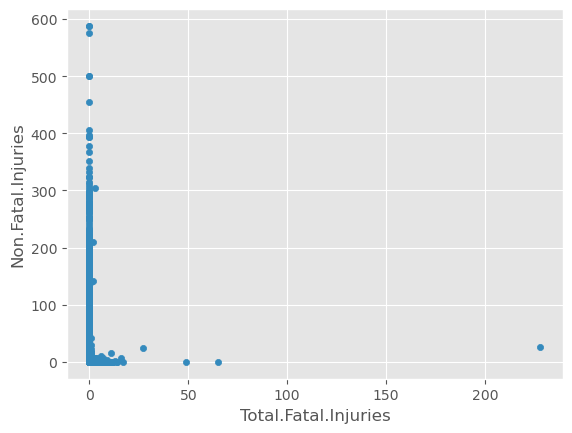

In [22]:
us_accidents.plot(kind='scatter', x='Total.Fatal.Injuries', y='Non.Fatal.Injuries')

<Axes: xlabel='Event.Date', ylabel='Total.Fatal.Injuries'>

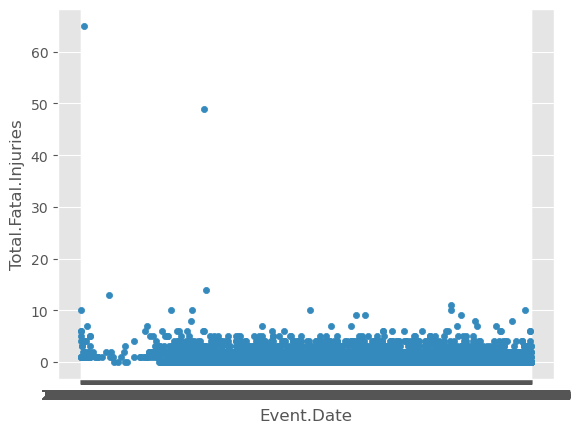

In [56]:
after_regulation = df[(df['Country'] == 'United States') & (df['Event.Date'] > '1998-01-01')]

after_regulation.plot(kind='scatter', x='Event.Date', y='Total.Fatal.Injuries')

In [76]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [80]:
df['Year'] = df['Event.Date'].dt.strftime('%Y')

In [105]:
grouped_by_year = df[df['Country'] == 'United States'].groupby('Year').sum(numeric_only = True)

In [106]:
grouped_by_year = grouped_by_year.reset_index()

In [131]:
df['Nonfatal'] = df['Total.Serious.Injuries'] + df['Total.Minor.Injuries'] + df['Total.Uninjured']

<Axes: xlabel='Model'>

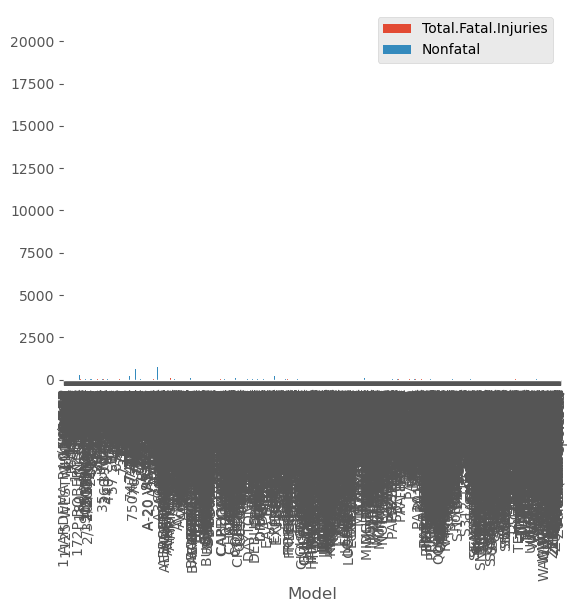

In [135]:
df[['Model', 'Total.Fatal.Injuries', 'Nonfatal']].groupby('Model').sum().plot(kind='bar')